## Important Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots  import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

## Loading the data 

In [2]:
df=pd.read_csv('C:/Users/gsowm/OneDrive/One Drive_1/OneDrive/Documents/Perrin Freres monthly champagne sales millions.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
#change the column name
df.columns=['Month','Sales']
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [5]:
#Check for null values
df.isna().sum()

Month    1
Sales    2
dtype: int64

In [6]:
#Dropping null values
df.dropna(inplace=True)
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [7]:
df.isna().sum()

Month    0
Sales    0
dtype: int64

we can see that the Month column is not in proper python date-time format, so we need to convert it first.

# Convert Month to Datetime

In [8]:
df['Month']=pd.to_datetime(df['Month'])
df

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [9]:
df.set_index('Month',inplace=True)
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


# visualize the Data 

<Axes: xlabel='Month'>

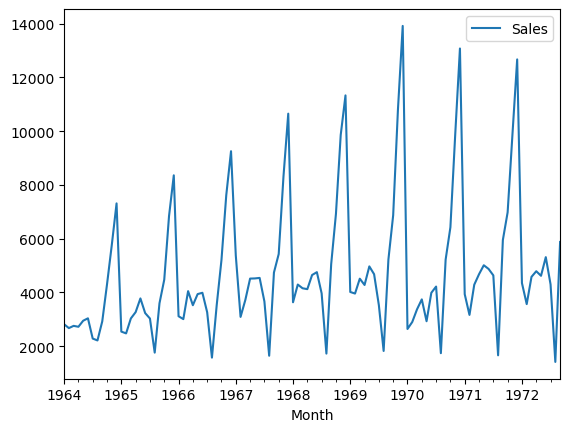

In [10]:
df.plot()

The Plot above shows it is seasonal data

Before we can build a model, we must ensure that the time series is stationary. There are two primary way to determine whether a given time series is stationary :

* Rolling Statistics: Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis).


Text(0.5, 1.0, 'Rolling Mean and Rolling Standard Deviation')

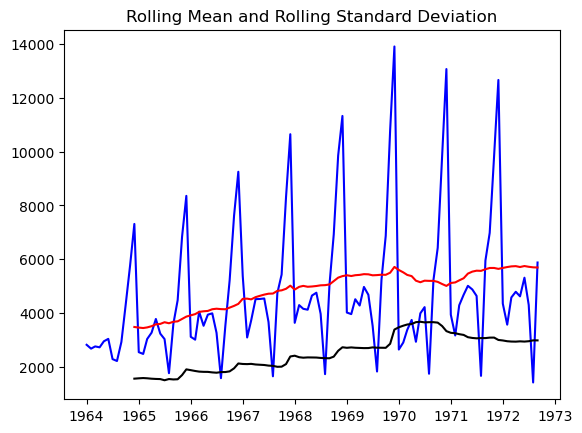

In [11]:
rolling_mean=df.rolling(window=12).mean()
rolling_std_dev=df.rolling(window=12).std()
plt.plot(df,color='Blue',label='Original data')
plt.plot(rolling_mean,color='Red',label='Rolling Mean')
plt.plot(rolling_std_dev,color='Black',label='Rolling_std')
plt.title('Rolling Mean and Rolling Standard Deviation')

Augmented Dickey-Fuller Test:
* The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics.

In [12]:
#Augmented Dickey Fuller Test
test_results=adfuller(df['Sales'])

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

* Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
 Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it     is stationary. It does not have time-dependent structure.
     We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the   null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-   stationary).

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [13]:
def adfuller_test(sales):
    results=adfuller(sales)
    labels=['ADF Test Statistics','p-value','#Lags Used','Number of Observations used']
    for value,label in zip(results,labels):
        print(label+':'+str(value))
    print('Critical Values:')
    for key, value in results[4].items():
            print('\t%s: %.3f' % (key, value))
    if results[1]<=0.05:
        print('Strong evidence against the null hypothesis testing (Ho),reject the null hypothesis.Data has no unit root and is a stationary series')
    else:
        print('Weak evidence against the null hypothesis testing (Ho),reject the null hypothesis.Time series has a unit root ,indicating it is a non-stationary series')
adfuller_test(df['Sales'])       
 

ADF Test Statistics:-1.833593056327635
p-value:0.36391577166023914
#Lags Used:11
Number of Observations used:93
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584
Weak evidence against the null hypothesis testing (Ho),reject the null hypothesis.Time series has a unit root ,indicating it is a non-stationary series


* Running the example prints the test statistic value of -1. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

* As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -1 is greater than the value of -3.503 at 1%.
*  the p-value is greater than the threshold (0.05). 
This suggests that we failed to reject the null hypothesis with a significance level of greater than 1%  

* Failed to Reject the null hypothesis means that the process has unit root, and in turn that the time series is non-stationary or does have time-dependent structure.
 * We can conclude that the time series is not stationary.

# To make it stationary we will use Differencing :


 Differencing in statistics is a transformation applied to time-series data in order to make it stationary. This allows the properties do not depend on the time of observation, eliminating trend and seasonality and stabilizing the mean of the time series.

In [14]:
df['Sales First Difference']=df['Sales']-df['Sales'].shift(1)
df

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


Since it is seasonal data we need to shift by 12 as it completes 1 cycle of 12 months

Let’s perform Augmented Dickey-Fuller Test again to test whether the series is stationary or not post Differencing.


In [15]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)
df

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


In [16]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistics:-7.626619157213163
p-value:2.060579696813685e-11
#Lags Used:0
Number of Observations used:92
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Strong evidence against the null hypothesis testing (Ho),reject the null hypothesis.Data has no unit root and is a stationary series


Now , we can see that the p-value is less than the Significance level od 0.05. Thus, Null Hypothesis is Rejected and the time series is Stationary.

<Axes: xlabel='Month'>

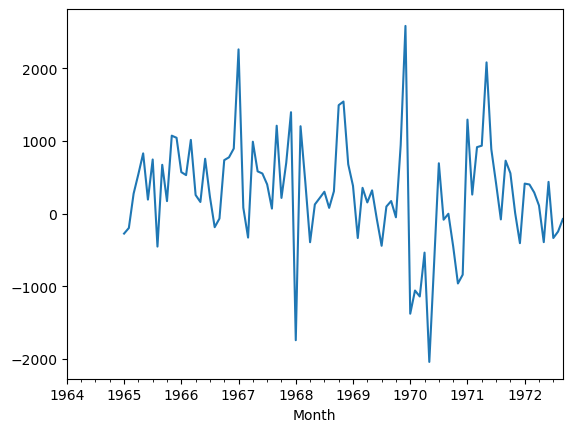

In [17]:
df['Seasonal First Difference'].plot()

lags- how many previous day data i have to consider

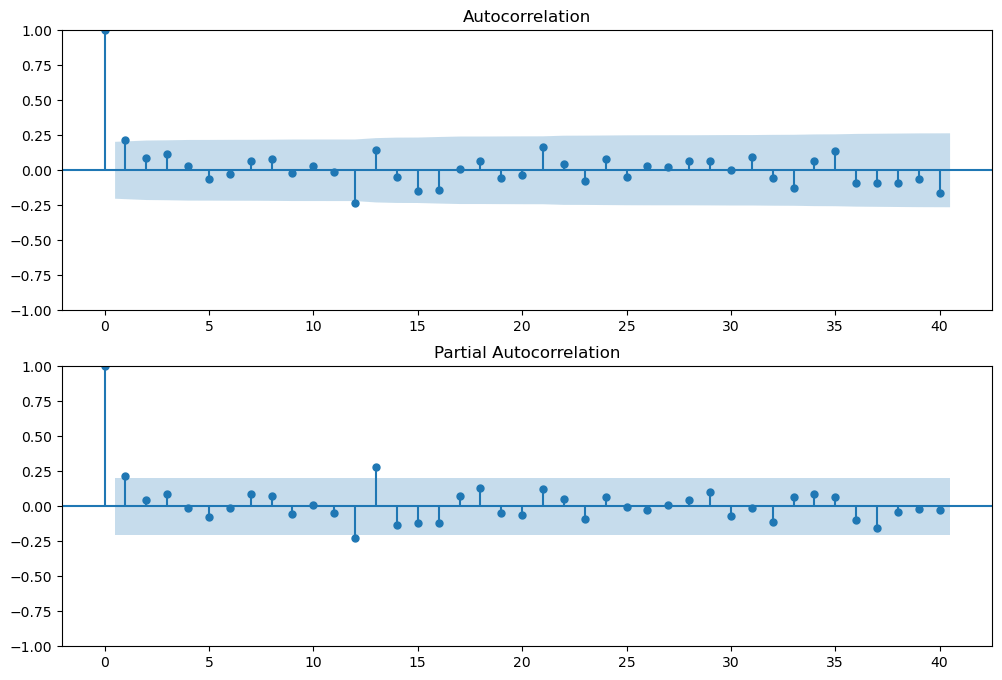

In [39]:
fig=plt.figure(figsize=(12,8))
axl=fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=axl)
ax2=fig.add_subplot(212)
fig= plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)


In [46]:
#ARIMA should be only selected when the data is non seasonal 
#p=1,d=1,q=0 or 1
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\gsowm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gsowm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gsowm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sun, 01 Oct 2023   AIC                           1911.627
Time:                        18:56:55   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.998      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.305      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Lets View the forecasting using ARIMA

<Axes: xlabel='Month'>

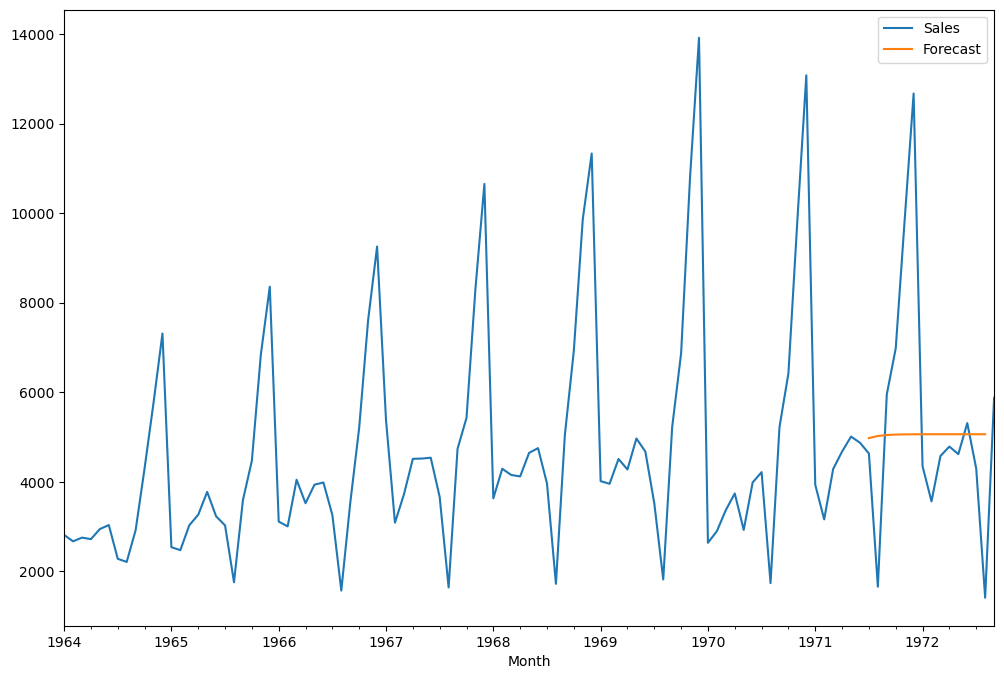

In [48]:
df['Forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','Forecast']].plot(figsize=(12,8))

Here we can see that the forecasting is not good using ARIMA, since the time series exhibits seasonality.

So, now we will implement Seasonal-ARIMA

# Seasonal-ARIMA(SARIMA):


As the name suggests, this model is used when the time series exhibits seasonality. This model is similar to ARIMA models, we just have to add in a few parameters to account for the seasons.

We write SARIMA as
ARIMA(p,d,q)(P, D, Q)m,
p — the number of autoregressive
d — degree of differencing
q — the number of moving average terms
m — refers to the number of periods in each season
(P, D, Q ) — represents the (p,d,q) for the seasonal part of the time series

Seasonal differencing takes into account the seasons and differences the current value and it’s value in the previous season eg: Difference for the month may would be value in May 2018 — value in may 2017.

In [52]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\gsowm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gsowm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

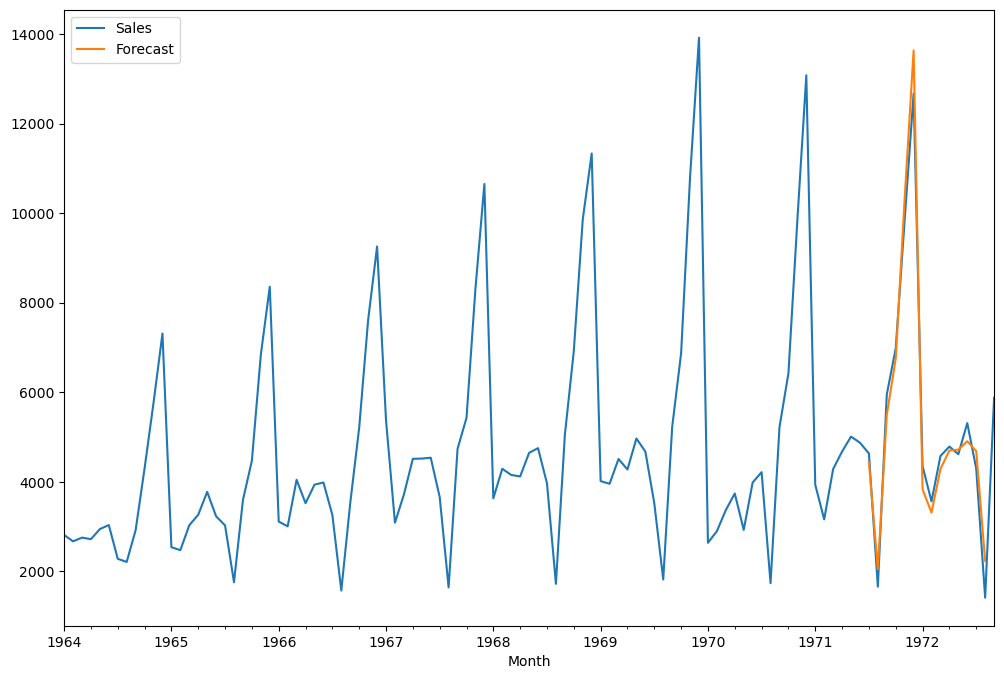

In [53]:
df['Forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','Forecast']].plot(figsize=(12,8))

Observation :
* Here, we can see that forecasting using SARIMA gave awesome results since the data exhibited seasonality.


Now, let’s add some data points to our original dataset synthtically , so that future forecasting can be observed .

In [58]:
future_dates=[df.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [60]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [62]:
future_df=pd.concat([df,future_dates_df])

## Plot the future predictions

<Axes: >

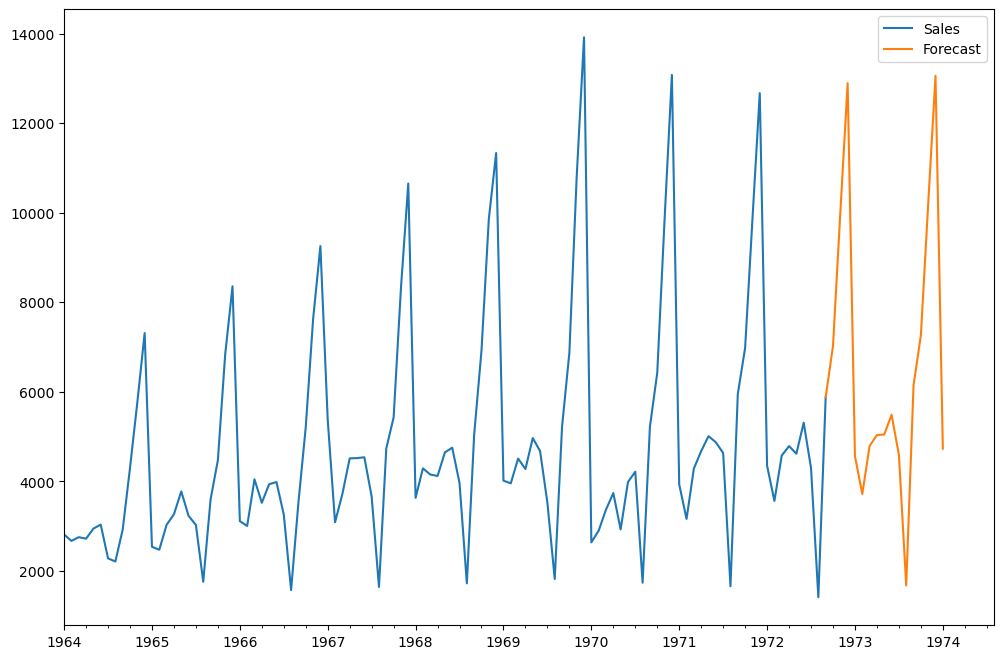

In [64]:
future_df['Forecast']=results.predict(start=104,end=120,dynamic=True)
future_df[['Sales','Forecast']].plot(figsize=(12,8))